<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg"  width=300, align="right">
<br>
<br>
<br>
<br>
<br>

# **Template para o Colab do Projeto Semestral**
---

Atenção, podem ser que nem todas as tarefas sejam executadas no Colab (a aplicação por exemplo, pode estar hospedada no streamlit cloud). Mas a maior parte pode estar aqui ou ao menos indicada e comentada.


Além disso a entrega deve incluir:

1. **Um GitHub público do projeto**
2. **Código completo e executável em um notebook Python (este template)**
3. **Uma aplicação streamlit para consumo do modelo**
4. **Um texto/artigo do projeto**
5. **Um vídeo (link YouTube ou outro) de no máximo 3min de apresentação do projeto**

Um **`readme.md`** no GitHub público do projeto deve indicar (um índice) cada uma dessas entregas.








In [ ]:
#@title **Identificação do Grupo**

#@markdown Integrantes do Grupo, nome completo em orgem alfabética (*informe \<RA\>,\<nome\>*)
Aluno1 = '10402406, Diogo Lourenzon Hatz' #@param {type:"string"}
Aluno2 = '10390247, Matteo Domiciano Varnier' #@param {type:"string"}




In [ ]:
#@title Assinale aqui a sua opção de Projeto
Projeto = "IA Aplicada a Imagens: Uso de Modelos de Redes Neurais" #@param ["IA Aplicada a Imagens: Uso de Modelos de Redes Neurais", "IA Aplicada a Documentos: Uso de Grandes Modelos de Linguagem Abertos"]




# **Resumo**

Neste trabalho, desenvolvemos um modelo de rede neural para classificação de imagens de indivíduos usando ou não chapéus através das bibliotecas Tensorflow e Keras, disponibilizadas na linguagem de programação Python, e o desenvolvimento de uma aplicação para consumo do modelo e predição de novas imagens por meio do framework Streamlit.

# **Apresentação dos dados**

O dataset foi criado do zero utilizando a ferramenta Imageye para coletar imagens das duas classes:

- Pessoas com chapéu

- Pessoas sem chapéu

Essas imagens foram organizadas em pastas e compactadas em arquivos .zip.




____________________________
### Importacao das bibliotecas necessarias para todas o codio

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

  __________________________
  ## Dataset.zip

Realiza o download do dataset criado a partir de fontes primárias de dado:


In [2]:
import urllib.request

url = "https://drive.usercontent.google.com/download?id=1eaAm9-t_GRBegrVY4E0tQhn-XgADtBk1&export=download&authuser=0&confirm=t&uuid=7a29d7a8-1a40-431d-aeb5-d6540d2667a9&at=ALoNOgnPKEj4n2M7xD1oYftBdhjZ%3A1746887210052"
urllib.request.urlretrieve(url, 'dataset.zip')

('dataset.zip', <http.client.HTTPMessage at 0x7d90e6e02910>)

#### Extrai o dataset e lista os diretórios relativos às classes do problema

In [3]:
import zipfile
import os

with zipfile.ZipFile('dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('dataset')

os.listdir('dataset')

['no_hat', 'hat']

___________________________
  ## Predict.zip

Download do dataset relativo à predição de novas imagens

In [4]:
url = "https://drive.google.com/uc?export=download&id=11LQr8df8FMAe_V6x8sfumkG-Mdj6_W62"
urllib.request.urlretrieve(url, 'predict.zip')

('predict.zip', <http.client.HTTPMessage at 0x7d90e5683f10>)

#### Extrai o dataset e lista os diretórios relativos às classes do problema


In [5]:
with zipfile.ZipFile('predict.zip', 'r') as zip_ref:
    zip_ref.extractall('predict')

os.listdir('predict')

['predict_no_hat', 'predict_hat']

____________________________
# **Preparação e transformação dos dados**

As imagens foram processadas com as seguintes etapas:

- Redimensionadas para 128x128 pixels

- Valores de pixels normalizados entre 0 e 1 com rescale=1./255

- Separação dos dados em 80% para treino e 20% para validação



In [6]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    'dataset',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='training',
    seed = 123
)

val_data = datagen.flow_from_directory(
    'dataset',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    seed = 123
)

Found 418 images belonging to 2 classes.
Found 103 images belonging to 2 classes.


Normaliza as imagens do dataset e realiza a separação dos dados em conjunto de treinamento e validação

____________________________
# **Fine Tuning do modelo**
Foi construído um modelo CNN simples, realiza a sua compilação e treinamento, com a seguinte arquitetura:



In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_data, validation_data=val_data, epochs=10)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.4205 - loss: 1.6527 - val_accuracy: 0.5922 - val_loss: 0.6862
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.6513 - loss: 0.6824 - val_accuracy: 0.6019 - val_loss: 0.6739
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.6959 - loss: 0.6500 - val_accuracy: 0.5922 - val_loss: 0.6521
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.7484 - loss: 0.5279 - val_accuracy: 0.6796 - val_loss: 0.5807
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.8585 - loss: 0.4075 - val_accuracy: 0.6990 - val_loss: 0.5386
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.8882 - loss: 0.2752 - val_accuracy: 0.7184 - val_loss: 0.5818
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.9333 - loss: 0.1900 - val_accuracy: 0.7184 - val_loss: 0.6137
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.9736 - loss: 0.1016 - val_accuracy: 0.7379 - val_loss:

Compilação:

- Otimizador: adam

- Perda: binary_crossentropy

- Métrica: accuracy

- Treinado por 10 épocas.

____________________________
# **Avaliação do modelo**

Após o treinamento:

Acurácia de validação próxima de 98%

Predições feitas corretamente sobre novas imagens



### Import das bibliotecas necessárias

In [8]:
import numpy as np
from tensorflow.keras.preprocessing import image

____________________________
### Normaliza as imagens do dataset

In [9]:
def carregar_imagem(caminho_img):
    img = image.load_img(caminho_img, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

In [10]:
import matplotlib.pyplot as plt

____________________________
### Realiza a predição de novas imagens e faz a sua plotagem

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
[[0.00523101]]


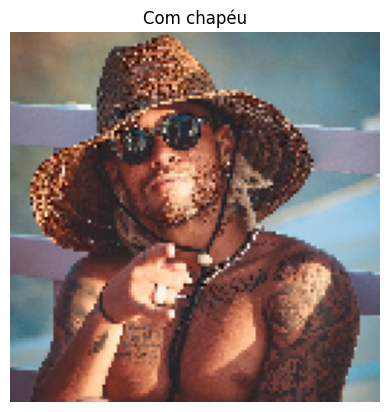

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
[[0.9271806]]


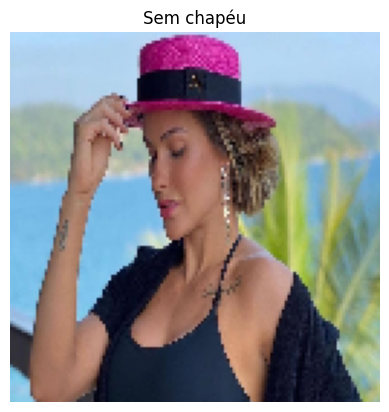

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
[[0.03210043]]


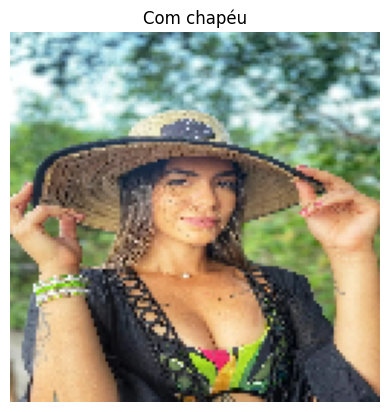

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
[[0.95240176]]


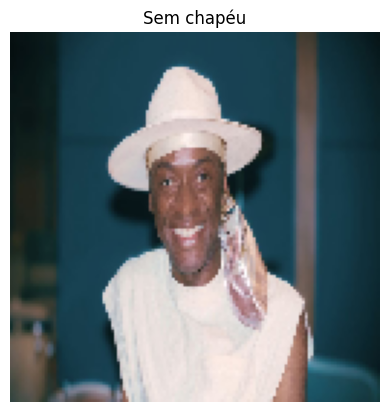

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
[[0.15193237]]


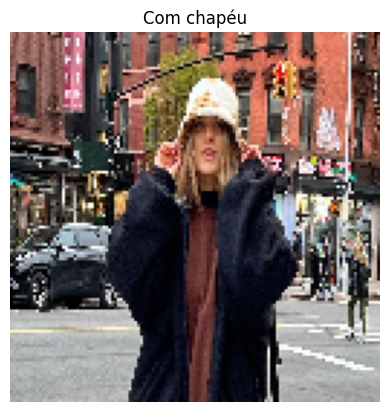

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
[[0.37260762]]


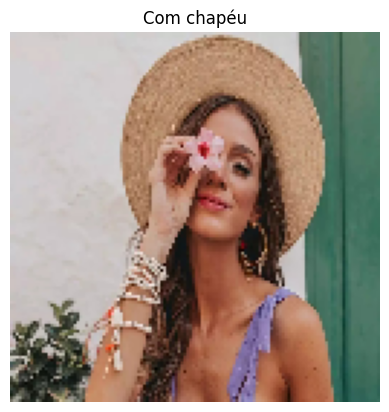

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
[[0.03672947]]


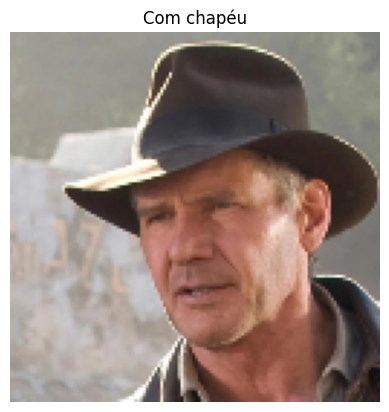

In [11]:
for i in range(len(os.listdir('predict/predict_hat'))):
    path = os.path.join('predict/predict_hat', os.listdir('predict/predict_hat')[i])
    img = carregar_imagem(path)
    predicao = model.predict(img)
    print(predicao)

    img_plot = image.load_img(path, target_size=(128, 128))
    plt.imshow(img_plot)
    plt.axis('off')
    plt.title("Sem chapéu" if predicao[0][0] > 0.5 else "Com chapéu")
    plt.show()

____________________________
### Realiza a predição de novas imagens e faz a sua plotagem

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
[[0.13079359]]


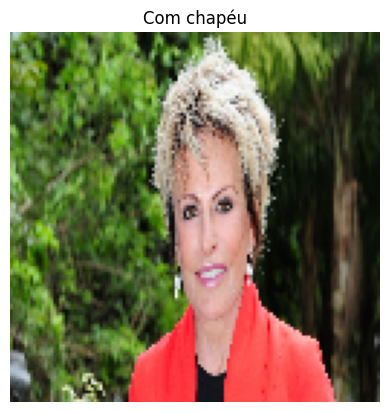

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
[[0.9310831]]


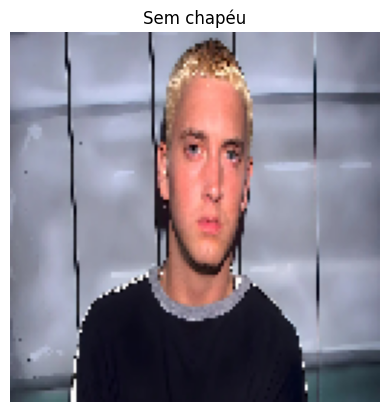

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
[[0.9958613]]


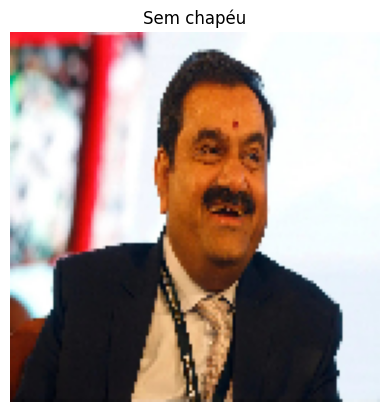

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
[[0.26068446]]


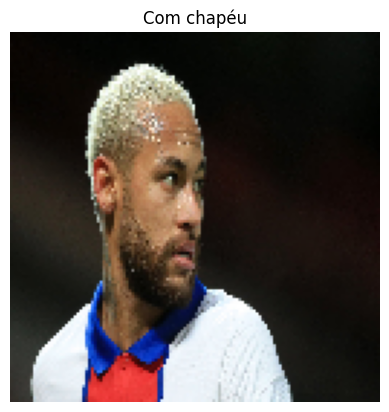

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
[[0.9999998]]


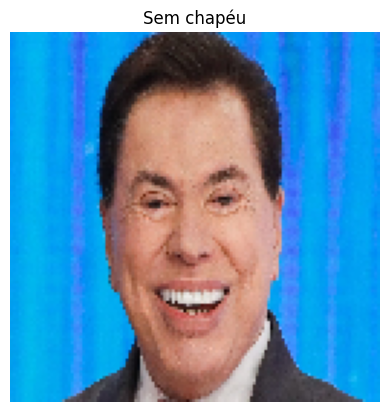

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
[[0.99724746]]


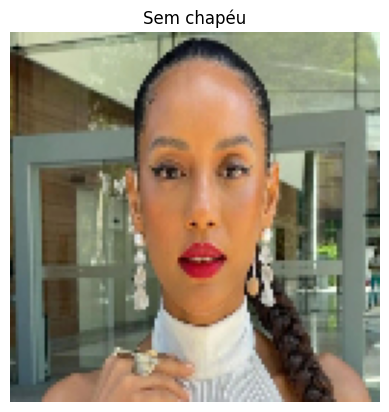

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
[[0.1330972]]


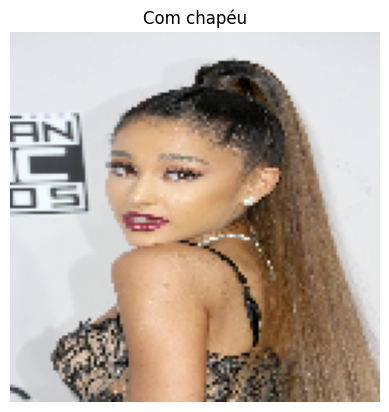

In [12]:
for i in range(len(os.listdir('predict/predict_no_hat'))):
    path = os.path.join('predict/predict_no_hat', os.listdir('predict/predict_no_hat')[i])
    img = carregar_imagem(path)
    predicao = model.predict(img)
    print(predicao)

    img_plot = image.load_img(path, target_size=(128, 128))
    plt.imshow(img_plot)
    plt.axis('off')
    plt.title("Sem chapéu" if predicao[0][0] > 0.5 else "Com chapéu")
    plt.show()

____________________________
# **Consumo do modelo**

Salva o modelo de rede neural treinado para import na aplicação Streamlit desenvolvida




In [13]:
model.save('meu_modelo.h5', save_format='h5')

Na aplicação, o fluxo é:

- O usuário faz o upload de uma imagem

- A imagem é redimensionada e normalizada

- O modelo é carregado com load_model('meu_modelo.h5')

- A predição é exibida na tela com a classificação ("Com chapéu" ou "Sem chapéu")


# **Referências**

* DSA, E. Capítulo 47 - Reconhecimento de Imagens com Redes Neurais Convolucionais em Python – Parte 4 - Deep Learning Book. Disponível em: https://www.deeplearningbook.com.br/reconhecimento-de-imagens-com-redes-neurais-convolucionais-em-python-parte-4/. Acesso em: 03 de Abril de 2025.
* Streamlit. Documentação oficial do Streamlit. Disponível em: https://docs.streamlit.io. Acesso em: 15 de maio de 2025.
* Pandas. Guia do Usuário do Pandas. Disponível em: https://pandas.pydata.org/docs/user_guide/index.html. Acesso em: 15 de maio de 2025.
* Plotly. Documentação Python – Gráficos interativos com Plotly. Disponível em: https://plotly.com/python/. Acesso em: 15 de maio de 2025.
* TensorFlow. API do TensorFlow – Todos os símbolos. Disponível em: https://www.tensorflow.org/api_docs/python/tf/all_symbols. Acesso em: 15 de maio de 2025.
* TensorFlow. API do TensorFlow – Keras. Disponível em: https://www.tensorflow.org/api_docs/python/tf/keras. Acesso em: 15 de maio de 2025.
* Chollet, F. Deep Learning with Python. Manning Publications Co., 2018.
* Goodfellow, I.; Bengio, Y.; Courville, A. Deep Learning. MIT Press, 2016. Disponível em: https://www.deeplearningbook.org. Acesso em: 15 de maio de 2025.
* Raschka, S.; Mirjalili, V. Python Machine Learning. 3. ed. Packt Publishing, 2019.
* Geron, A. Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems. 2. ed. O’Reilly Media, 2019.

---

In [ ]:
#@title **Avaliação**
GitHub = 10 #@param {type:"slider", min:0, max:10, step:1}

Implementacao_Model_Code = 7 #@param {type:"slider", min:0, max:10, step:1}

Aplicacao_Streamlit = 9 #@param {type:"slider", min:0, max:10, step:1}

Texto_Artigo  = 6 #@param {type:"slider", min:0, max:10, step:1}

Video = 7 #@param {type:"slider", min:0, max:10, step:1}

Geral = 7 #@param {type:"slider", min:0, max:10, step:1}








In [ ]:
#@title **Nota Final**

nota = 2*GitHub + 4*Implementacao_Model_Code + 2*Aplicacao_Streamlit + 1*Texto_Artigo + 1*Video

nota = nota / 10

print(f'Nota final do trabalho {nota :.1f}')

import numpy as np
import pandas as pd

alunos = pd.DataFrame()

lista_tia = []
lista_nome = []

for i in range(1,6):
  exec("if Aluno" + str(i) + " !='None':  lista = Aluno" + str(i) + ".split(','); lista_tia.append(lista[0]); lista_nome.append(lista[1].upper())")

alunos['tia'] = lista_tia
alunos['nome'] = lista_nome
alunos['nota'] = np.round(nota,1)
print()
display(alunos)

Nota final do trabalho 7.9



,tia,nome,nota
0,1115665,ADRIANA FUJITA,7.9
1,1115677,DANIEL HENRIQUE,7.9
